<a href="https://colab.research.google.com/github/LaurenVaught/DogsVsCats/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ingest

In [7]:
! pip install -q kaggle

In [18]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"laurenvaught","key":"1bb6c61b62054c5b5b111b2394ac5fa8"}'}

In [19]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                     Wine Quality Dataset                                21KB  2022-01-15 19:15:11           7250  
mkoklu42/pistachio-dataset                                       Pistachio Dataset                                    2MB  2022-02-11 21:06:50             27  
prasertk/netflix-subscription-price-in-different-countries       Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           5594  
mkoklu42/durum-wheat-dataset                                     Durum Wheat Dataset                                983MB  2022-02-18 09:34:17              7  
majyhain/height-of-male-and-female-by-co

In [20]:
! kaggle competitions download -c 'dogs-vs-cats-redux-kernels-edition'

 97% 525M/544M [00:03<00:00, 173MB/s]
100% 544M/544M [00:03<00:00, 173MB/s]
 96% 261M/271M [00:01<00:00, 183MB/s]
100% 271M/271M [00:01<00:00, 162MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 105MB/s]


In [24]:
import zipfile
train = ! unzip 'train.zip'
test= ! unzip 'test.zip'

In [27]:
#https://www.kaggle.com/dilipkumar2k6/dogs-vs-cats-with-new-kernel
# Extract the first 3 letters from the image names, to generate one hot encoding labels
def label_pet_image(img):
    pet = img.split('.')[-3]
    if pet == 'cat': return 0
    elif pet == 'dog': return 1

In [28]:
# Process the data (both train and test set)
from tqdm import tqdm
import cv2
from random import shuffle
IMG_SIZE=64
# set sample size
SAMPLE_SIZE=20000
def process_data(DATA_FOLDER, isTrain=True):
    # Read images from extracted directory
    image_list = os.listdir(DATA_FOLDER)
    filtered_image_list = image_list[0:SAMPLE_SIZE if isTrain else len(image_list)]
    data_df = [] # data frame
    for img in tqdm(filtered_image_list):
        path = os.path.join(DATA_FOLDER,img)
        if(isTrain):
            label = label_pet_image(img)
        else:
            label = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        try:
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            data_df.append([np.array(img),label])
        except Exception as e:
            print("Image with issue name, path, isTrain, label", img, path, isTrain, label)
            print(str(e))            
    shuffle(data_df)
    return data_df

In [29]:
train = process_data('./train')

100%|██████████| 20000/20000 [00:55<00:00, 359.54it/s]


In [30]:
test = process_data('./test', False)

100%|██████████| 12500/12500 [00:33<00:00, 376.21it/s]


In [31]:
# plot to see how it looks
from matplotlib import pyplot as plt
%matplotlib inline
def plot_sample(data, isTrain=True):
    img = data[0]
    plt.figure(figsize=(15,2))
    plt.imshow(img)
    if isTrain:
        plt.xlabel(classes[data[1]])


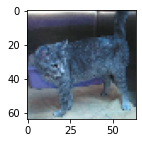

In [33]:
#visualize image
plot_sample(test[4], False)

In [34]:
# Prepare the train data
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array([i[1] for i in train])
test_X = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [35]:
# normalize our data in 0-1
X = X/255
test_X = test_X/255

In [36]:
from sklearn.model_selection import train_test_split
train_X, validation_X, train_y, validation_y = train_test_split(X, y, test_size=0.3)

In [37]:
train_y

array([1, 1, 1, ..., 1, 0, 1])

In [38]:
import tensorflow as tf
from tensorflow import keras
# First apply Artificial neural network (ANN)
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)), # Flaten 3d to 1d
    keras.layers.Dense(3000, activation='relu'), # more hidden layer gives better perf
    keras.layers.Dense(1000, activation='relu'), # more hidden layer gives better perf
    keras.layers.Dense(100, activation='relu'), # more hidden layer gives better perf
    keras.layers.Dense(1, activation='sigmoid')    
])
ann.compile(optimizer='SGD', loss= keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
ann.fit(train_X, train_y, epochs=10)

Epoch 1/10
438/438 [==============================] - 78s 175ms/step - loss: 0.6760 - accuracy: 0.5796
Epoch 2/10
438/438 [==============================] - 73s 168ms/step - loss: 0.6531 - accuracy: 0.6135
Epoch 3/10
438/438 [==============================] - 74s 170ms/step - loss: 0.6400 - accuracy: 0.6326
Epoch 4/10
438/438 [==============================] - 74s 170ms/step - loss: 0.6305 - accuracy: 0.6386
Epoch 5/10
438/438 [==============================] - 74s 169ms/step - loss: 0.6183 - accuracy: 0.6518
Epoch 6/10
438/438 [==============================] - 74s 168ms/step - loss: 0.6115 - accuracy: 0.6635
Epoch 7/10
438/438 [==============================] - 74s 168ms/step - loss: 0.5997 - accuracy: 0.6739
Epoch 8/10
438/438 [==============================] - 73s 168ms/step - loss: 0.5889 - accuracy: 0.6811
Epoch 9/10
438/438 [==============================] - 74s 169ms/step - loss: 0.5840 - accuracy: 0.6896
Epoch 10/10
438/438 [==============================] - 78s 179ms/step - l

In [39]:
ann.evaluate(validation_X, validation_y)

188/188 [==============================] - 14s 76ms/step - loss: 0.6955 - accuracy: 0.5928


[0.6955196857452393, 0.5928333401679993]

In [40]:
pred_y = ann.predict(test_X)

In [41]:
pred_y[0:10]

array([[0.4293006 ],
       [0.464976  ],
       [0.55562854],
       [0.20219842],
       [0.17909765],
       [0.12168619],
       [0.24659666],
       [0.670668  ],
       [0.27507463],
       [0.09623978]], dtype=float32)

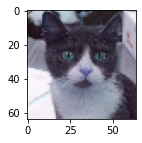

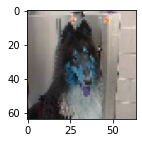

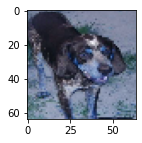

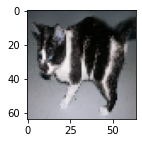

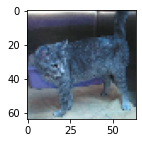

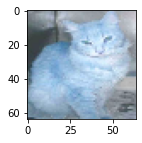

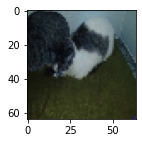

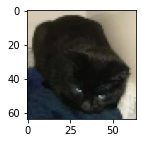

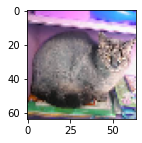

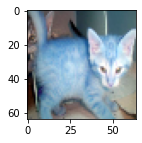

In [42]:
for i in range(0,10):
    plot_sample(test[i], False)

In [43]:
# Apply CNN
cnn = keras.Sequential([
    # cnn layer
    keras.layers.Conv2D(filters=IMG_SIZE, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,3)),
    keras.layers.MaxPooling2D(2,2),
    # second layer for cnn
    keras.layers.Conv2D(filters=IMG_SIZE, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # dense layer
    keras.layers.Flatten(), # Flaten 3d to 1d
    keras.layers.Dense(IMG_SIZE, activation='relu'),    # cnn will already reduce layers so need less here
    keras.layers.Dense(1, activation='softmax') # softmax will normalize probability   
])
cnn.compile(optimizer='SGD', loss= keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
cnn.fit(train_X, train_y, epochs=5)

Epoch 1/5
438/438 [==============================] - 130s 296ms/step - loss: 0.6829 - accuracy: 0.4985
Epoch 2/5
438/438 [==============================] - 120s 273ms/step - loss: 0.6660 - accuracy: 0.4985
Epoch 3/5
438/438 [==============================] - 121s 276ms/step - loss: 0.6494 - accuracy: 0.4985
Epoch 4/5
438/438 [==============================] - 120s 273ms/step - loss: 0.6347 - accuracy: 0.4985
Epoch 5/5
438/438 [==============================] - 121s 276ms/step - loss: 0.6199 - accuracy: 0.4985


In [44]:
cnn.evaluate(validation_X, validation_y)

188/188 [==============================] - 27s 140ms/step - loss: 0.6258 - accuracy: 0.5020


[0.6257680058479309, 0.5019999742507935]

In [45]:
pred_y = ann.predict(test_X)

In [46]:
pred_y[0:10]


array([[0.4293006 ],
       [0.464976  ],
       [0.55562854],
       [0.20219842],
       [0.17909765],
       [0.12168619],
       [0.24659666],
       [0.670668  ],
       [0.27507463],
       [0.09623978]], dtype=float32)

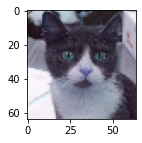

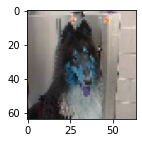

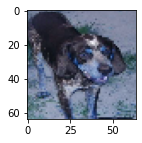

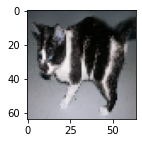

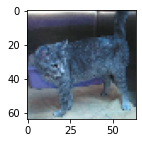

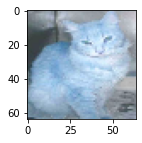

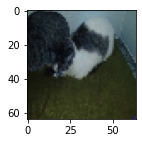

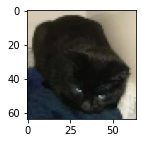

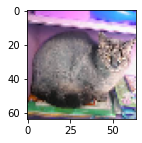

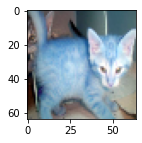

In [47]:
for i in range(0,10):
    plot_sample(test[i], False)